## Graduate admissions linear regression exercise
Chris Mintz

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import math

### Step 1:

As dataset, we will use:
https://www.kaggle.com/mohansacharya/graduate-admissions

The CSV of the dataset (Admission_Predict.csv) is loaded from local then brought in through a pandas data frame

In [2]:
# step 1 - load the data
df = pd.read_csv('Admission_Predict.csv')

Have a look at the dataset.

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


### Step 2:
Separate the features into X and labels into Y.

In [5]:
# features are columns 1 to 7
x = df.iloc[:, 1:8].values

#labels are in column 8
y = df.iloc[:, 8].values

### Step 3:
Perform data normalization

In [6]:
# min-max scaling of the features is the approach we will use
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

#peek at the first 10 records
p_x_scaled = pd.DataFrame(x_scaled, columns = df.columns[1:8])
print(p_x_scaled.head(10))

   GRE Score  TOEFL Score  University Rating    SOP   LOR       CGPA  Research
0       0.94     0.928571               0.75  0.875  0.875  0.913462       1.0
1       0.68     0.535714               0.75  0.750  0.875  0.663462       1.0
2       0.52     0.428571               0.50  0.500  0.625  0.384615       1.0
3       0.64     0.642857               0.50  0.625  0.375  0.599359       1.0
4       0.48     0.392857               0.25  0.250  0.500  0.451923       0.0
5       0.80     0.821429               1.00  0.875  0.500  0.814103       1.0
6       0.62     0.607143               0.50  0.500  0.750  0.448718       1.0
7       0.36     0.321429               0.25  0.500  0.750  0.352564       0.0
8       0.24     0.357143               0.00  0.250  0.125  0.384615       0.0
9       0.66     0.571429               0.50  0.625  0.500  0.576923       0.0


### Step 4:
Split the data into train (80%) and test (20%) sets

In [7]:
# creating our test and training datasets using the scaled features
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2)

### Step 5:
Fit a linear regression model to your data, and print the intercept and coefficients

In [8]:
# init the linear regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

# now find the intercept and coefficients
print("intercept: ", regressor.intercept_)
print("coefficients: ", regressor.coef_)

intercept:  0.36049027054232624
coefficients:  [ 0.12075217  0.08374359  0.02003062 -0.01008298  0.06458722  0.34329923
  0.02439593]


### Step 6:
Make predictions on the test data and assess the performance of your model using MAE, MSE, and RMSE

In [9]:
# generate predictions from model
y_pred = regressor.predict(x_test)

# compare the actual and predicted values and get MAE, MSE and RMSE
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.04926483862036202
Mean Squared Error: 0.005083702273705035
Root Mean Squared Error: 0.07130008607081084


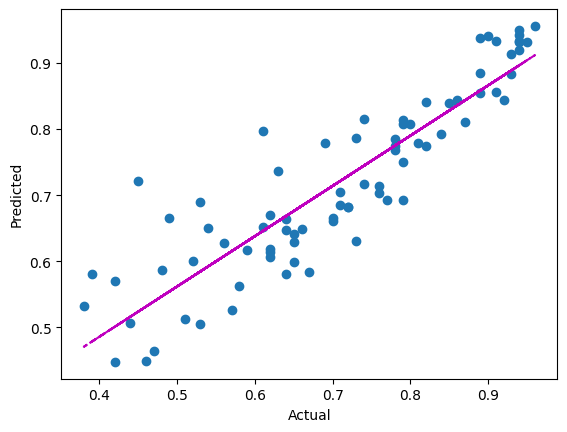

In [10]:
# plot the actual vs predicted values and add the diagonal line
plt.scatter(y_test, y_pred)

z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),"m--")

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


In [11]:
# evaluate the weight of the features

# dictionary to hold the features and their weights
feature_weights = {}

weights = regressor.coef_
features = df.columns[1:8]
for i in range(len(features)):
    # add to a dictionary
    feature_weights[features[i]] = weights[i]

# order the features by their weights
sorted_feature_weights = sorted(feature_weights.items(), key=lambda x: x[1], reverse=True)

# check out the weight sorted features
sorted_feature_weights


[('CGPA', 0.3432992317190579),
 ('GRE Score', 0.12075216858432121),
 ('TOEFL Score', 0.08374359328164174),
 ('LOR ', 0.06458721538928021),
 ('Research', 0.02439592506133563),
 ('University Rating', 0.020030623158817512),
 ('SOP', -0.010082983639274623)]